In [1]:
import glob
import tensorflow as tf
import matplotlib.pyplot as plt

2022-10-26 22:16:43.293697: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-26 22:16:43.411665: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/kev/.mujoco/mujoco210/bin:/usr/lib/nvidia
2022-10-26 22:16:43.411683: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-26 22:16:43.441943: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2

In [15]:
def get_section_results(file, *tags):
    vals = tuple([] for _ in tags)
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag in tags:
                vals[tags.index(v.tag)].append(v.simple_value)
    return vals

root_data_dir = '../../data'

exp_names = {
    'Walker2d-v4': 'walker',
    'HalfCheetah-v4': 'halfcheetah'
}

def get_data_file(env_name, env_tasks, multitask, task):
    exp_name = exp_names[env_name]
    path = f'{root_data_dir}/{exp_name}_{env_tasks}_{multitask}_{env_name}_{task}_*/events*'
    return glob.glob(path)[0]

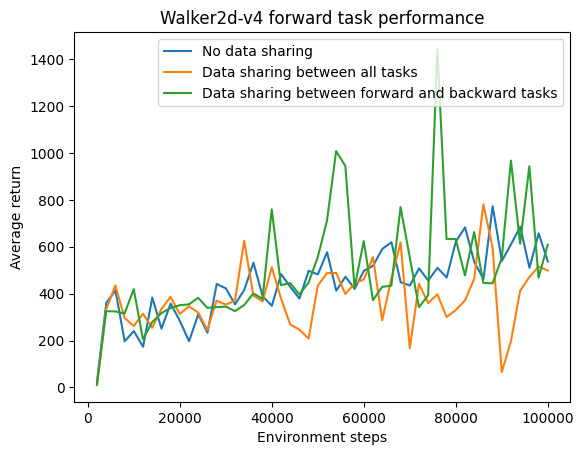

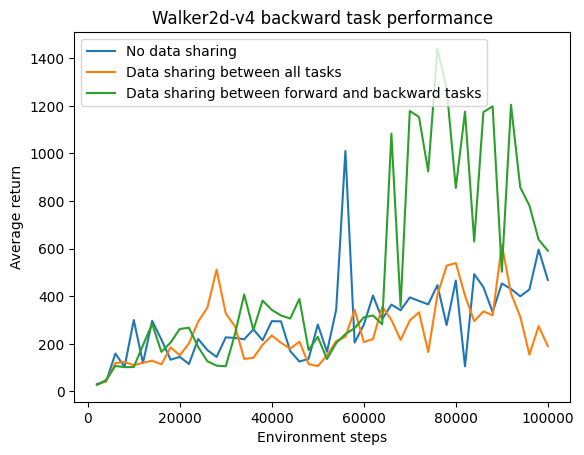

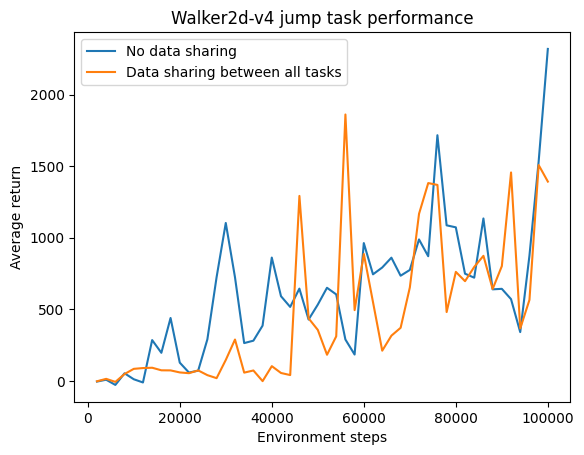

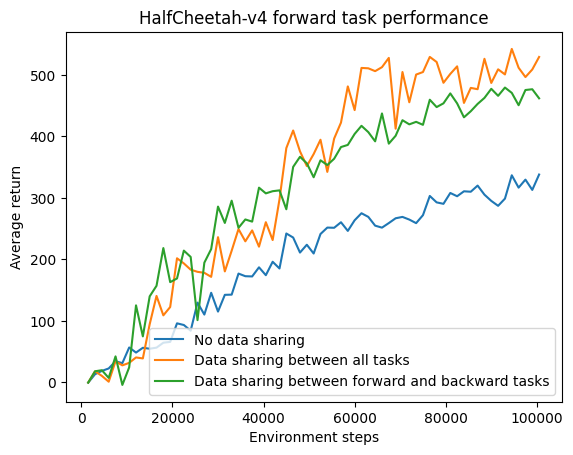

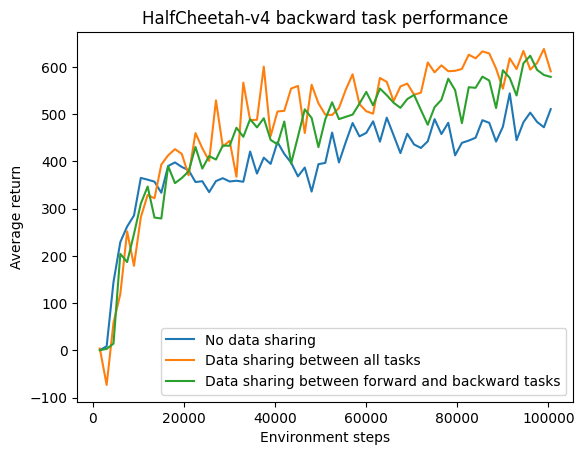

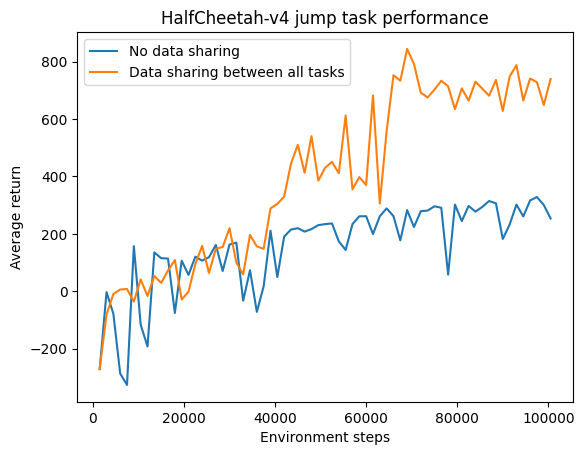

In [16]:
for env_name in ['Walker2d-v4', 'HalfCheetah-v4']:
    for task in ['forward', 'backward', 'jump']:
        task_files = {}
        task_files["No data sharing"] = get_data_file(env_name, 'fbj', 'none', task)
        task_files["Data sharing between all tasks"] = get_data_file(env_name, 'fbj', 'all', task)

        if task != 'jump':
            task_files["Data sharing between forward and backward tasks"] = get_data_file(env_name, 'fb', 'all', task)

        legend = []
        for label, file in task_files.items():
            legend.append(label)
            X, Y = get_section_results(file, 'Train_EnvstepsSoFar', 'Eval_AverageReturn')
            plt.plot(X, Y)

        plt.legend(legend)
        plt.title(f'{env_name} {task} task performance')
        plt.xlabel('Environment steps')
        plt.ylabel('Average return')
        plt.show()
